### 有序逻辑斯蒂回归

黄荣贵（复旦大学社会学系）

In [1]:
library(foreign)
warm <- read.dta("datasets/ordwarm2.dta")
head(warm)

warm,yr89,male,white,age,ed,prst,warmlt2,warmlt3,warmlt4,y,y1,y2
1SD,1977,Women,White,33,10,31,SD,"D,SD","A,D,SD",1,0,0
1SD,1977,Men,White,74,16,50,SD,"D,SD","A,D,SD",1,0,0
1SD,1989,Men,White,36,12,41,SD,"D,SD","A,D,SD",1,0,0
1SD,1977,Women,White,73,9,36,SD,"D,SD","A,D,SD",1,0,0
1SD,1977,Women,White,59,11,62,SD,"D,SD","A,D,SD",1,0,0
1SD,1989,Men,White,33,4,17,SD,"D,SD","A,D,SD",1,0,0


In [2]:
# use MASS::polr
library(MASS)
m <- polr(warm~yr89+male+white+age+ed+prst,data=warm)
summary(m)


Re-fitting to get Hessian



Call:
polr(formula = warm ~ yr89 + male + white + age + ed + prst, 
    data = warm)

Coefficients:
               Value Std. Error t value
yr891989    0.523912   0.079899   6.557
maleMen    -0.733309   0.078483  -9.344
whiteWhite -0.391140   0.118381  -3.304
age        -0.021666   0.002469  -8.777
ed          0.067176   0.015975   4.205
prst        0.006072   0.003293   1.844

Intercepts:
       Value    Std. Error t value 
1SD|2D  -2.4654   0.2389   -10.3188
2D|3A   -0.6309   0.2333    -2.7042
3A|4SA   1.2618   0.2340     5.3919

Residual Deviance: 5689.825 
AIC: 5707.825 

In [5]:
## 检验平行假定
library(brant)
brant(m)

-------------------------------------------- 
Test for	X2	df	probability 
-------------------------------------------- 
Omnibus		49.3	12	0
yr891989	13.01	2	0
maleMen		22.24	2	0
whiteWhite	1.27	2	0.53
age		7.38	2	0.02
ed		4.31	2	0.12
prst		4.33	2	0.11
-------------------------------------------- 


In [10]:
## use VGAM::vglm
library(VGAM)
m2 <- vglm(ordered(warm)~yr89+male+white+age+ed+prst, family=propodds, data=warm)
summary(m2)


Call:
vglm(formula = ordered(warm) ~ yr89 + male + white + age + ed + 
    prst, family = propodds, data = warm)

Pearson residuals:
                  Min      1Q  Median      3Q   Max
logit(P[Y>=2]) -4.844  0.1531  0.2244  0.5373 1.109
logit(P[Y>=3]) -2.872 -0.9299  0.3015  0.8573 2.525
logit(P[Y>=4]) -1.421 -0.6085 -0.2736 -0.1611 4.939

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept):1  2.465357   0.239499  10.294  < 2e-16 ***
(Intercept):2  0.630899   0.233775   2.699  0.00696 ** 
(Intercept):3 -1.261857   0.234797  -5.374 7.69e-08 ***
yr891989       0.523906   0.080407   6.516 7.24e-11 ***
maleMen       -0.733295   0.078526  -9.338  < 2e-16 ***
whiteWhite    -0.391161   0.118675  -3.296  0.00098 ***
age           -0.021665   0.002488  -8.710  < 2e-16 ***
ed             0.067173   0.015952   4.211 2.54e-05 ***
prst           0.006073   0.003290   1.846  0.06495 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Number of linea

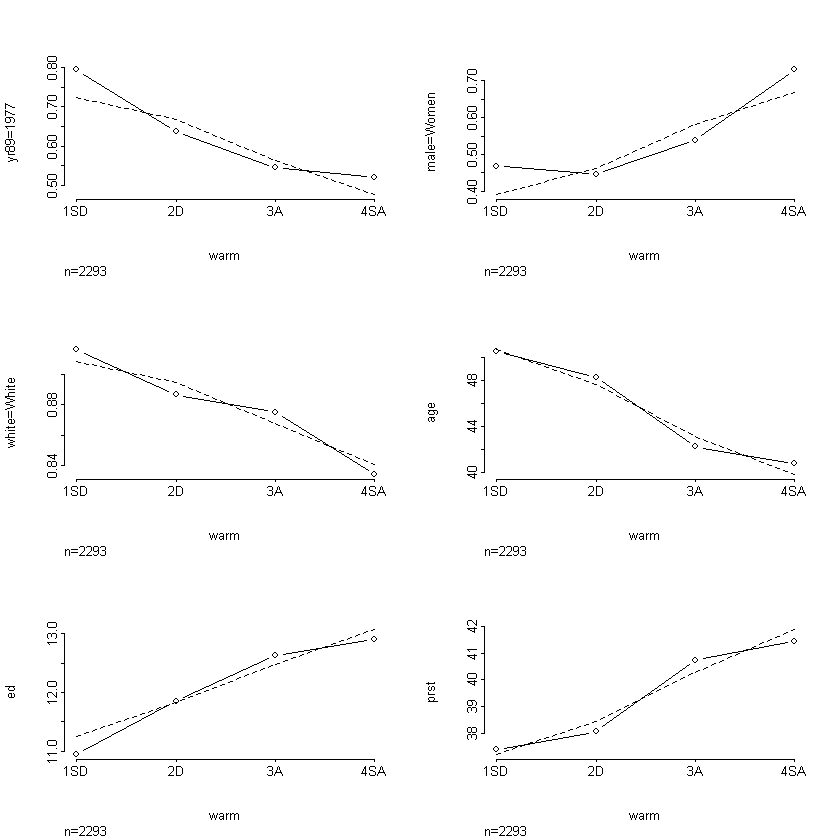

In [13]:
## use rms::lrm
library(rms)
## check po assumption
par(mfrow=c(3,2))
plot.xmean.ordinaly(warm~yr89+male+white+age+ed+prst,data=warm)

In [14]:
(m3 <- lrm(warm ~ yr89+male+white+age+ed+prst, data=warm, x=TRUE, y=TRUE))


Logistic Regression Model

lrm(formula = warm ~ yr89 + male + white + age + ed + prst, data = warm, 
    x = TRUE, y = TRUE)
Frequencies of Responses

1SD  2D  3A 4SA 
297 723 856 417 

                      Model Likelihood     Discrimination    Rank Discrim.    
                         Ratio Test            Indexes          Indexes       
Obs          2293    LR chi2     301.72    R2       0.133    C       0.658    
max |deriv| 5e-09    d.f.             6    g        0.785    Dxy     0.317    
                     Pr(> chi2) <0.0001    gr       2.193    gamma   0.318    
                                           gp       0.179    tau-a   0.226    
                                           Brier    0.221                     

            Coef    S.E.   Wald Z Pr(>|Z|)
y>=2D        2.4654 0.2389 10.32  <0.0001 
y>=3A        0.6309 0.2333  2.70  0.0068  
y>=4SA      -1.2619 0.2340 -5.39  <0.0001 
yr89=1989    0.5239 0.0799  6.56  <0.0001 
male=Men    -0.7333 0.0785 -9.34  <0.0001 
w

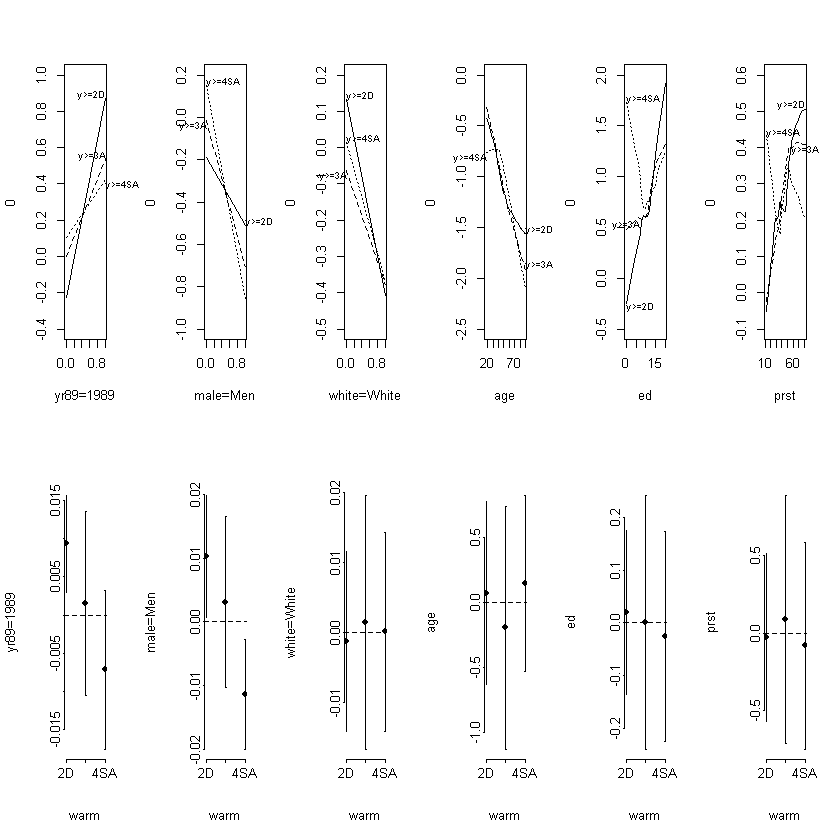

In [17]:
## check po assumption and transformation of IVs (via partial residuals)
par(mfrow=c(2,6))
residuals(m3, type="partial", pl=TRUE)
residuals(m3, type="score.binary", pl=TRUE)

## 有序probit模型

In [7]:
library(MASS)
mprobit <- polr(warm~yr89+male+white+age+ed+prst,data=warm, method="probit")

summary(mprobit)


Re-fitting to get Hessian



Call:
polr(formula = warm ~ yr89 + male + white + age + ed + prst, 
    data = warm, method = "probit")

Coefficients:
               Value Std. Error t value
yr891989    0.318813   0.046852   6.805
maleMen    -0.417028   0.045546  -9.156
whiteWhite -0.226500   0.069478  -3.260
age        -0.012221   0.001443  -8.471
ed          0.038724   0.009324   4.153
prst        0.003283   0.001925   1.705

Intercepts:
       Value    Std. Error t value 
1SD|2D  -1.4286   0.1388   -10.2942
2D|3A   -0.3606   0.1369    -2.6333
3A|4SA   0.7682   0.1371     5.6047

Residual Deviance: 5697.222 
AIC: 5715.222 

## 从定序逻辑斯蒂模型到局部平行模型

In [4]:
library(VGAM)

m3 <- vglm(ordered(warm)~yr89+male+white+age+ed+prst, family=cumulative(parallel=TRUE), data=warm)
summary(m3)


Call:
vglm(formula = ordered(warm) ~ yr89 + male + white + age + ed + 
    prst, family = cumulative(parallel = TRUE), data = warm)


Pearson residuals:
                  Min      1Q  Median      3Q   Max
logit(P[Y<=1]) -1.109 -0.5373 -0.2244 -0.1531 4.844
logit(P[Y<=2]) -2.525 -0.8573 -0.3015  0.9299 2.872
logit(P[Y<=3]) -4.939  0.1611  0.2736  0.6085 1.421

Coefficients: 
               Estimate Std. Error z value Pr(>|z|)    
(Intercept):1 -2.465357   0.239499 -10.294  < 2e-16 ***
(Intercept):2 -0.630899   0.233775  -2.699  0.00696 ** 
(Intercept):3  1.261857   0.234797   5.374 7.69e-08 ***
yr891989      -0.523906   0.080407  -6.516 7.24e-11 ***
maleMen        0.733295   0.078526   9.338  < 2e-16 ***
whiteWhite     0.391161   0.118675   3.296  0.00098 ***
age            0.021665   0.002488   8.710  < 2e-16 ***
ed            -0.067173   0.015952  -4.211 2.54e-05 ***
prst          -0.006073   0.003290  -1.846  0.06495 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘

$logit[P(Y<=j | x)] = \alpha_j - (\beta_{1j} x_1 + ... + \beta_{pj} x_p), j=1,...J-1$

In [6]:
m4 <- vglm(ordered(warm)~yr89+male+white+age+ed+prst, family=cumulative(parallel=FALSE), data=warm)
summary(m4)


Call:
vglm(formula = ordered(warm) ~ yr89 + male + white + age + ed + 
    prst, family = cumulative(parallel = FALSE), data = warm)


Pearson residuals:
                  Min      1Q  Median      3Q   Max
logit(P[Y<=1]) -1.260 -0.4749 -0.2249 -0.1514 4.765
logit(P[Y<=2]) -2.609 -0.8366 -0.2957  0.8985 2.932
logit(P[Y<=3]) -4.891  0.1570  0.2681  0.5451 1.305

Coefficients: 
               Estimate Std. Error z value Pr(>|z|)    
(Intercept):1 -1.856953   0.390774  -4.752 2.01e-06 ***
(Intercept):2 -0.719810   0.266485  -2.701  0.00691 ** 
(Intercept):3  1.002225   0.343655   2.916  0.00354 ** 
yr891989:1    -0.955744   0.153174  -6.240 4.39e-10 ***
yr891989:2    -0.536372   0.092002  -5.830 5.54e-09 ***
yr891989:3    -0.331219   0.113159  -2.927  0.00342 ** 
maleMen:1      0.300983   0.127710   2.357  0.01843 *  
maleMen:2      0.717994   0.089070   8.061 7.57e-16 ***
maleMen:3      1.085617   0.121810   8.912  < 2e-16 ***
whiteWhite:1   0.528730   0.226553   2.334  0.01961 *  
white

$logit[P(Y<=j | x)] = \alpha_j - (\beta_{1} x_1 + \beta_{2} x_2 + ... + \beta_{p-1,j} x_{p-1} + \beta_{pj} x_p), j=1,...J-1$

In [9]:
m5 <- vglm(ordered(warm)~yr89+male+white+age+ed+prst, family=cumulative(parallel=~white+ed+prst), data=warm)
summary(m5)


Call:
vglm(formula = ordered(warm) ~ yr89 + male + white + age + ed + 
    prst, family = cumulative(parallel = ~white + ed + prst), 
    data = warm)


Pearson residuals:
                  Min      1Q  Median      3Q   Max
logit(P[Y<=1]) -1.760 -0.4586 -0.2590 -0.1631 5.747
logit(P[Y<=2]) -2.340 -0.9245 -0.3027  0.8979 2.829
logit(P[Y<=3]) -8.442  0.1192  0.2530  0.5445 1.938

Coefficients: 
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.353601   0.236753  -1.494  0.13529    
yr891989:1  -1.176201   0.147924  -7.951 1.84e-15 ***
yr891989:2  -0.590225   0.090914  -6.492 8.46e-11 ***
yr891989:3  -0.128482   0.112647  -1.141  0.25405    
maleMen:1   -0.035451   0.116291  -0.305  0.76049    
maleMen:2    0.630990   0.086969   7.255 4.01e-13 ***
maleMen:3    1.404184   0.121546  11.553  < 2e-16 ***
whiteWhite   0.368613   0.119752   3.078  0.00208 ** 
age:1       -0.007340   0.002800  -2.622  0.00875 ** 
age:2        0.019362   0.002562   7.558 4.10e-14 ***
age:3    